<a href="https://colab.research.google.com/github/mdarshad1000/Natural-Language-Processing/blob/master/FakeNewsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -qU nltk

In [2]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [7]:
df['label'].unique()

array([1, 0])

In [8]:
df.shape

(20800, 5)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, HashingVectorizer

In [10]:
df = df.dropna()

In [11]:
df.shape

(18285, 5)

In [12]:
messages = df.copy()

In [13]:
messages.reset_index(inplace=True)

In [14]:
messages['title'][0]

'House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It'

In [15]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

ps = PorterStemmer()
corpus = []
for row in range(len(messages)):
  review = re.sub('[^a-zA-Z]', ' ', messages['title'][row])
  review = review.lower()
  review = review.split()

  review = [ps.stem(word) for word in review if word not in set(stopwords.words('english'))]
  review = ' '.join(review)
  corpus.append(review)

In [32]:
len(corpus)

18285

In [17]:
# Applying Bag of Words
# Creating the Bag of Words model

cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

max_features=5000 means that the resulting bag-of-words representation (X in your code) will include columns (features) corresponding to the 5000 most frequent words across the entire corpus, and the other less frequent words will be excluded. This can be useful for reducing the dimensionality of the feature space and focusing on the most informative words for your task.







In [18]:
X.shapes

(18285, 5000)

In [19]:
Y = messages['label']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state=0)

In [21]:
cv.get_feature_names_out()[:20]

array(['abandon', 'abc', 'abc news', 'abduct', 'abe', 'abedin', 'abl',
       'abort', 'abroad', 'absolut', 'abstain', 'absurd', 'abus',
       'abus new', 'abus new york', 'academi', 'accept', 'access',
       'access pipelin', 'access pipelin protest'], dtype=object)

In [33]:
len(cv.get_feature_names_out())

5000

In [22]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [23]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names_out())

In [24]:
count_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
import matplotlib.pyplot as plt
import itertools
import numpy as np

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


### Multinomial Naive Bayes

In [27]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
classifier = MultinomialNB()

Accuracy 0.9019055509527755
Confusion matrix, without normalization


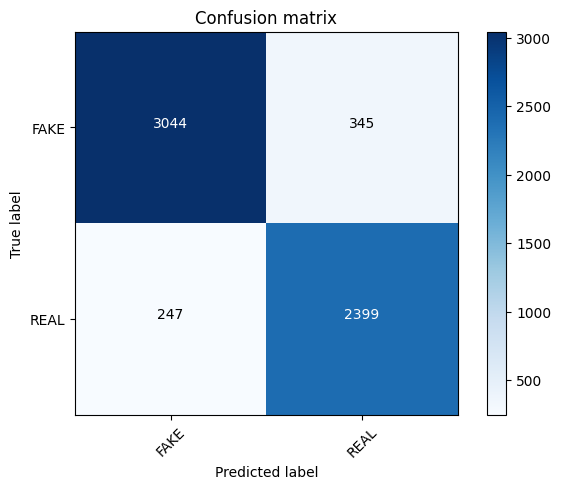

In [28]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
acc_score = metrics.accuracy_score(y_test, pred)
print("Accuracy", acc_score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classifier ALgorithm

In [34]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier()

Accuracy: 0.9196354598177299
Confusion matrix, without normalization


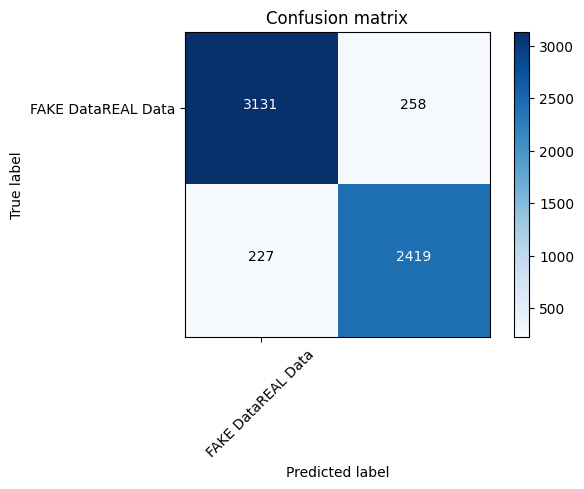

In [38]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy: {score}")
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=["FAKE Data" "REAL Data"])

### Multinomaial Classifier with Hyperparameter

In [39]:
classifier = MultinomialNB(alpha=0.1)

In [40]:
previous_score = 0
for alpha in np.arange(0,1,0.1):
  sub_classifier = MultinomialNB(alpha=alpha)
  sub_classifier.fit(X_train, y_train)
  pred = sub_classifier.predict(X_test)
  score = metrics.accuracy_score(y_test, pred)
  if previous_score < score:
    classifier = sub_classifier
  print(f"Alpha: {alpha}, Score: {score}")

/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:629: FutureWarning: The default value for `force_alpha` will change to `True` in 1.4. To suppress this warning, manually set the value of `force_alpha`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py:635: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10. Use `force_alpha=True` to keep alpha unchanged.
  warnings.warn(


Alpha: 0.0, Score: 0.8903065451532726
Alpha: 0.1, Score: 0.9020712510356255
Alpha: 0.2, Score: 0.9025683512841757
Alpha: 0.30000000000000004, Score: 0.9024026512013256
Alpha: 0.4, Score: 0.9017398508699255
Alpha: 0.5, Score: 0.9015741507870754
Alpha: 0.6000000000000001, Score: 0.9022369511184756
Alpha: 0.7000000000000001, Score: 0.9025683512841757
Alpha: 0.8, Score: 0.9015741507870754
Alpha: 0.9, Score: 0.9017398508699255


In [45]:
# Get features name
feature_name = cv.get_feature_names_out()
len(feature_name)

5000

The output `classifier.feature_log_prob_` is a NumPy array containing log probabilities associated with features (words) for each class in a Multinomial Naive Bayes classifier. In your case, it appears that you have two classes, as there are two arrays within the outer array. Let's break down what each array denotes:

```python
array([[ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
        -11.45845755,  -9.42157562],
       [ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
         -8.91467169,  -9.32864749]])
```

- **First Array:**
  - The first array corresponds to the log probabilities of features for the first class (let's call it Class 0).
  - Each value in this array represents the log probability of a specific word (feature) occurring in documents of Class 0.
  - The index of each value corresponds to the index of the feature in the vocabulary learned by the `CountVectorizer`.

- **Second Array:**
  - The second array corresponds to the log probabilities of features for the second class (let's call it Class 1).
  - Like the first array, each value represents the log probability of a specific word occurring in documents of Class 1.

In general terms:

- **Log Probabilities:**
  - More negative log probabilities indicate lower likelihoods of those features occurring in the respective class.
  - Features with higher (less negative) log probabilities are more indicative of the respective class.

These log probabilities are essential for the Naive Bayes classifier to calculate probabilities during the prediction phase. The model considers these probabilities when determining the likelihood of a document belonging to a particular class based on the observed words in that document.

In [50]:
classifier.feature_log_prob_

array([[ -9.06056227,  -9.06056227, -10.28838629, ...,  -9.99212048,
        -11.45845755,  -9.42157562],
       [ -9.10038883,  -8.62276128,  -9.10038883, ..., -10.79498456,
         -8.91467169,  -9.32864749]])

In [54]:
# Most fake words, reverse=Ture will give most real words
sorted(zip(classifier.feature_log_prob_[0], feature_name), reverse=False)[:20]

[(-11.458457546147459, 'access pipelin protest'),
 (-11.458457546147459, 'acknowledg emf'),
 (-11.458457546147459, 'acknowledg emf damag'),
 (-11.458457546147459, 'acquit'),
 (-11.458457546147459, 'acr'),
 (-11.458457546147459, 'adhd'),
 (-11.458457546147459, 'airstrik kill'),
 (-11.458457546147459, 'al nusra'),
 (-11.458457546147459, 'america last'),
 (-11.458457546147459, 'america vote'),
 (-11.458457546147459, 'american concern'),
 (-11.458457546147459, 'american concern elect'),
 (-11.458457546147459, 'american peopl defeat'),
 (-11.458457546147459, 'aqsa'),
 (-11.458457546147459, 'arabian'),
 (-11.458457546147459, 'ariel noyola'),
 (-11.458457546147459, 'ariel noyola rodr'),
 (-11.458457546147459, 'ask question'),
 (-11.458457546147459, 'auf'),
 (-11.458457546147459, 'avail')]